In [11]:
%matplotlib inline

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Dropbox/SimulationOutput/hierarchy1/stats.sqlite')

In [23]:
q = pd.read_sql_table('stats', conn)
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)
allc = q.unstack(-1)
allc.columns = allc.columns.levels[1]
allc.tail()
allc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 90150 entries, (1, 1, 0) to (3, 50, 60000)
Data columns (total 18 columns):
C_1       90101 non-null float64
C_2       90089 non-null float64
C_3       90110 non-null float64
C_4       90103 non-null float64
C_5       60060 non-null float64
C_6       60050 non-null float64
C_7       30014 non-null float64
C_8       30020 non-null float64
C_MAX     89905 non-null float64
C_MEAN    89905 non-null float64
C_MXMN    89942 non-null float64
F_MAX     90150 non-null float64
F_MEAN    90150 non-null float64
F_VAR     90150 non-null float64
N_MEAN    150 non-null float64
N_MED     150 non-null float64
N_PERC    150 non-null float64
N_VAR     150 non-null float64
dtypes: float64(18)
memory usage: 12.7+ MB


In [3]:
def get_treat_rep(t, r):
    return allc.groupby(level=[0,1]).get_group((t,r)).reset_index([0, 1]).drop('treatment_id', axis=1).drop('replicate_id', axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bf59d50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c9c3610>], dtype=object)

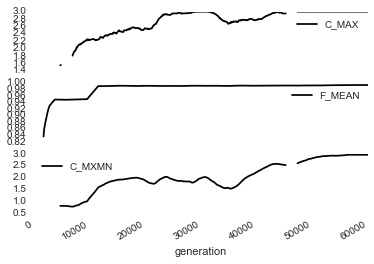

In [27]:
currep = get_treat_rep(3, 47)
pd.rolling_mean(currep[['C_MAX', 'F_MEAN', 'C_MXMN']], 20).plot(subplots=True)

In [28]:
currep.tail()

kind,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_MAX,C_MEAN,C_MXMN,F_MAX,F_MEAN,F_VAR,N_MEAN,N_MED,N_PERC,N_VAR
generation,,,,,,,,,,,,,,,,,,
59600,2.973928,0.001585,0.436709,0.014522,0.000021,0.257603,0.006312,0.012139,3,3.702820,2.973928,1,0.993250,0.001076,NaN,NaN,NaN,NaN
59700,2.971240,0.002533,0.439490,0.015088,0.000012,0.258469,0.008272,0.006347,3,3.701450,2.971240,1,0.994310,0.000935,NaN,NaN,NaN,NaN
59800,2.980379,0.001644,0.448149,0.010315,0.000046,0.249201,0.005464,0.005565,3,3.700764,2.980379,1,0.994521,0.000874,NaN,NaN,NaN,NaN
59900,2.965847,0.000668,0.461061,0.006567,0.000068,0.246610,0.005014,0.003263,3,3.689099,2.965847,1,0.992563,0.001210,NaN,NaN,NaN,NaN
60000,2.958540,0.000803,0.468957,0.004588,0.000468,0.239790,0.003218,0.002176,3,3.678540,2.958540,1,0.992579,0.001099,0.856852,0.875,0.34777,0.021484


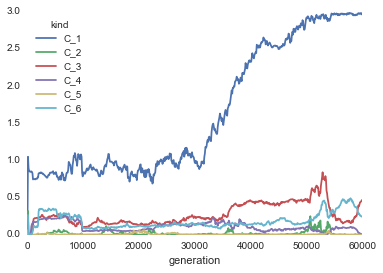

In [30]:
currep.plot(y=['C_%d' % (i+1) for i in range(6)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d52fbd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dda2250>], dtype=object)

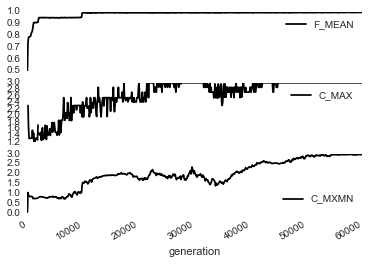

In [31]:
currep.plot(y=["F_MEAN", "C_MAX", "C_MXMN"], subplots=True)

In [43]:
finals = pd.read_sql_query('select treatment_id, value from stats where generation = 50000 and kind = "C_MXMN"', conn)

In [44]:
finals.tail()

,treatment_id,value
145,3,0.234790
146,3,2.917612
147,3,1.867270
148,3,2.726502
149,3,0.379262


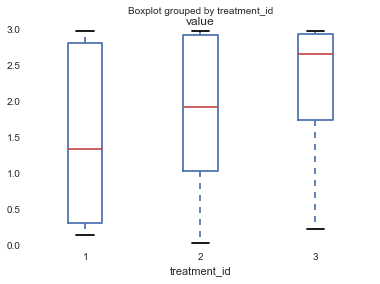

In [45]:
finals.boxplot(column='value',by='treatment_id')

In [15]:
nay = pd.read_sql_query('select treatment_id, replicate_id, kind, value from stats where generation = 60000 and kind in ("N_PERC", "C_MXMN")', conn, index_col=['treatment_id', 'replicate_id', 'kind'])
nay = nay.unstack(-1)
nay.columns = nay.columns.levels[1]
nay.reset_index(inplace=True)
nay.tail()

kind,treatment_id,replicate_id,C_MXMN,N_PERC
145,3,46,0.286616,0.30660
146,3,47,2.958540,0.34777
147,3,48,1.943392,0.40466
148,3,49,2.966794,0.42395
149,3,50,0.404999,0.27270


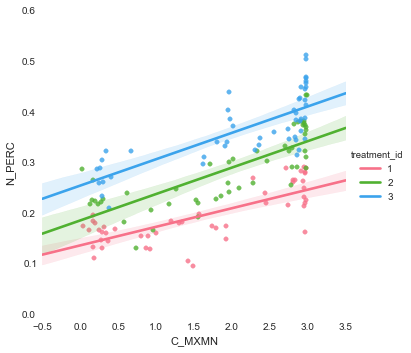

In [16]:
sb.lmplot(x="C_MXMN", y="N_PERC", data=nay, hue='treatment_id')

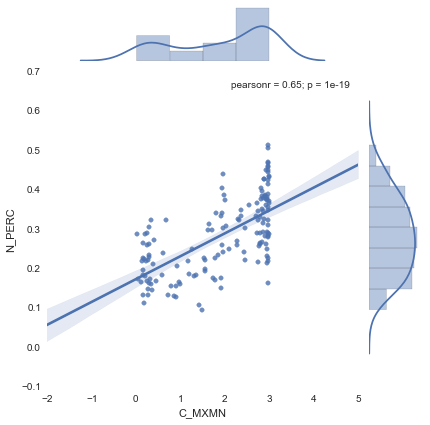

In [42]:
sb.jointplot(x="C_MXMN", y="N_PERC", data=nay, kind='reg')

In [20]:
from scipy.stats import kendalltau

In [21]:
print kendalltau(nay['N_PERC'], nay['C_MXMN'])

(0.48098434004474244, 2.4526030871129387e-18)
